# Modelo 1 Tabela Stress

## importações

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

## Leitura do CSV e informações da tabela

In [151]:
data = pd.read_csv("..\\assets\\data\\Student Stress Factors.csv")

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Sleep Quality                        520 non-null    int64
 1   suffer headaches                     520 non-null    int64
 2   academic performance                 520 non-null    int64
 3   study load                           520 non-null    int64
 4   practice extracurricular activities  520 non-null    int64
 5   stress levels                        520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [153]:
data.head()

,Sleep Quality,suffer headaches,academic performance,study load,practice extracurricular activities,stress levels
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [154]:
data.columns

Index(['Sleep Quality', 'suffer headaches', 'academic performance',
       'study load', 'practice extracurricular activities', 'stress levels'],
      dtype='object')

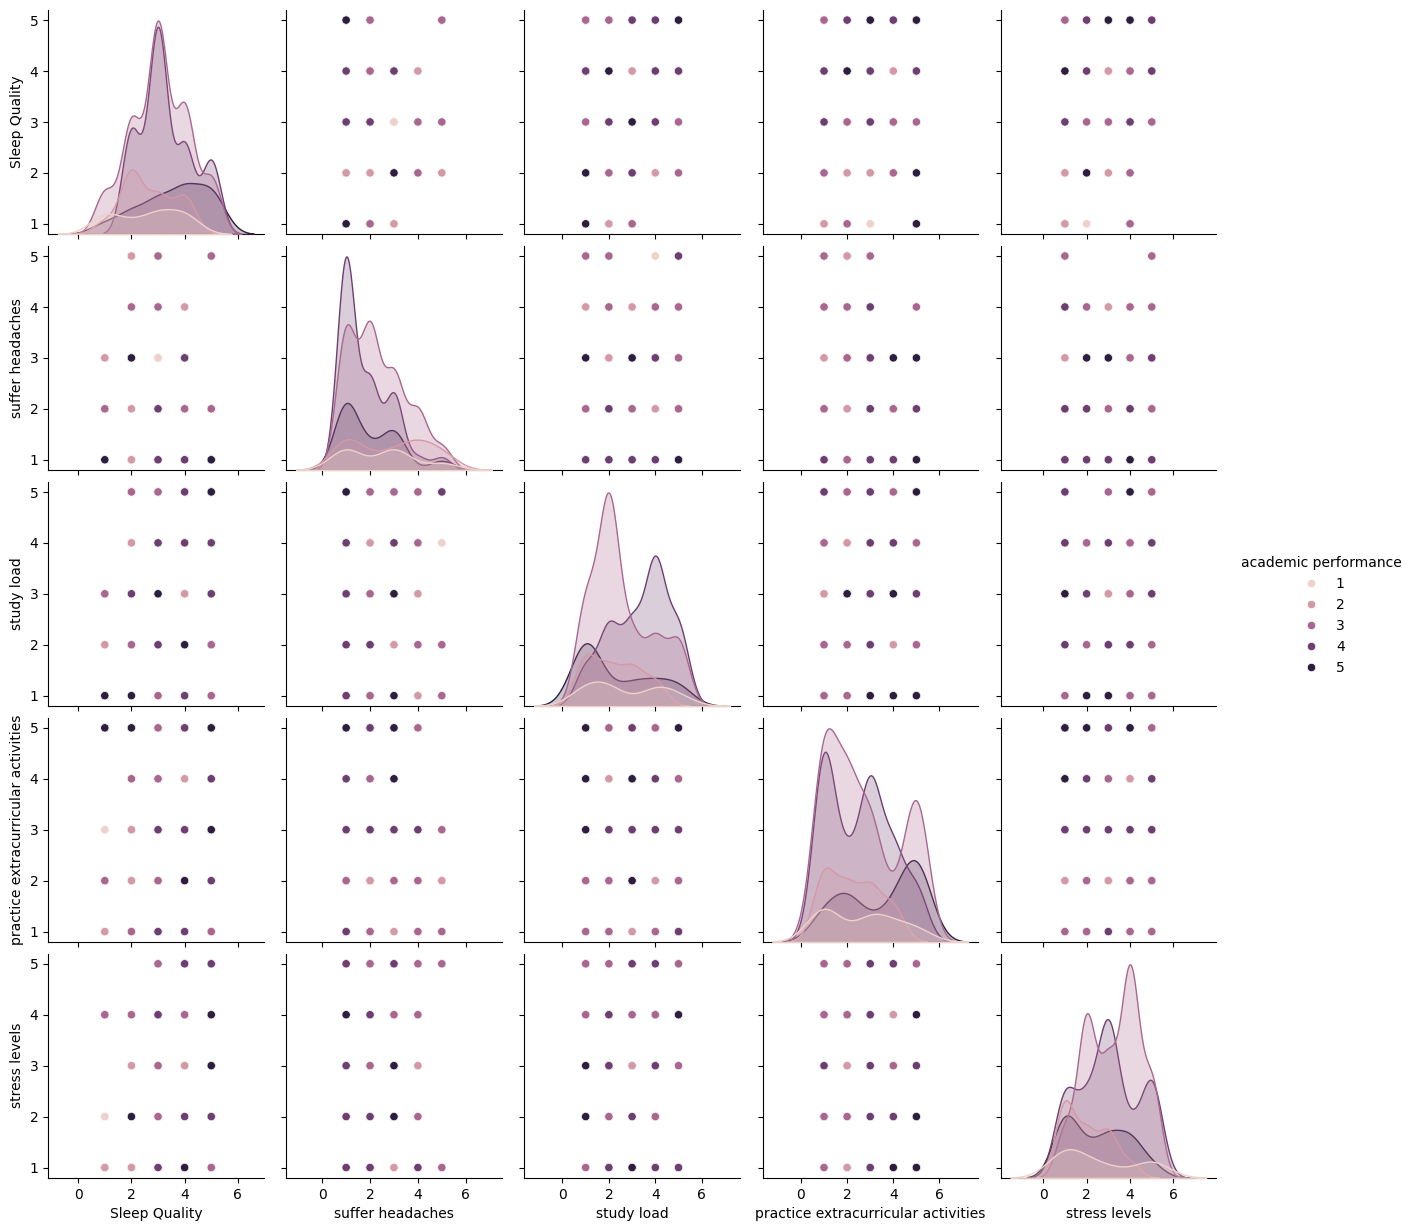

In [155]:
sns.pairplot(data, hue='academic performance')

## Codigo

### New dataframe

In [156]:
scaler = StandardScaler()

In [157]:
scaler.fit(data.drop('academic performance', axis=1))

StandardScaler()

In [158]:
df_normalizado = scaler.transform(data.drop('academic performance', axis=1))

In [159]:
df_normalizado

array([[-0.1138469 , -0.94899385,  0.91170283, -0.46462824,  0.09214761],
       [ 0.7969283 , -0.94899385,  0.18234057,  0.21595397, -0.64503328],
       [-1.0246221 , -0.94899385, -1.27638396,  0.89653619,  0.8293285 ],
       ...,
       [-1.0246221 ,  0.65580876, -1.27638396,  1.57711841, -0.64503328],
       [-0.1138469 ,  1.45821006,  1.64106509, -0.46462824,  1.56650939],
       [ 1.7077035 , -0.94899385,  1.64106509,  1.57711841,  0.8293285 ]])

In [160]:
df_param = pd.DataFrame(df_normalizado, columns=data.drop('academic performance', axis=1).columns)

In [161]:
df_param

,Sleep Quality,suffer headaches,study load,practice extracurricular activities,stress levels
0,-0.113847,-0.948994,0.911703,-0.464628,0.092148
1,0.796928,-0.948994,0.182341,0.215954,-0.645033
2,-1.024622,-0.948994,-1.276384,0.896536,0.829329
3,-0.113847,-0.146593,-0.547022,0.215954,0.092148
4,-1.024622,0.655809,1.641065,1.577118,0.092148
...,...,...,...,...,...
515,-0.113847,-0.146593,-0.547022,0.215954,-1.382214
516,-1.024622,1.458210,-0.547022,-1.145210,-0.645033
517,-1.024622,0.655809,-1.276384,1.577118,-0.645033
518,-0.113847,1.458210,1.641065,-0.464628,1.566509


In [162]:
df_param.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sleep Quality                        520 non-null    float64
 1   suffer headaches                     520 non-null    float64
 2   study load                           520 non-null    float64
 3   practice extracurricular activities  520 non-null    float64
 4   stress levels                        520 non-null    float64
dtypes: float64(5)
memory usage: 20.4 KB


### KNN

In [163]:
X_train, X_test, y_train, y_test = train_test_split(df_param, data['academic performance'], test_size=0.25,random_state=1)

In [164]:
knn = KNeighborsClassifier(n_neighbors=1)

In [165]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [166]:
pred = knn.predict(X_test)

In [167]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



In [168]:
print(confusion_matrix(y_test,pred))

[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


In [169]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

In [170]:
error_rate

[0.023076923076923078,
 0.023076923076923078,
 0.023076923076923078,
 0.046153846153846156,
 0.14615384615384616,
 0.2846153846153846,
 0.3384615384615385,
 0.35384615384615387,
 0.36153846153846153,
 0.3230769230769231,
 0.2846153846153846,
 0.2923076923076923,
 0.36923076923076925,
 0.36153846153846153,
 0.38461538461538464,
 0.4076923076923077,
 0.4307692307692308,
 0.4307692307692308,
 0.4230769230769231,
 0.4461538461538462,
 0.45384615384615384,
 0.43846153846153846,
 0.5076923076923077,
 0.5384615384615384,
 0.5538461538461539,
 0.5692307692307692,
 0.5846153846153846,
 0.5615384615384615,
 0.5769230769230769,
 0.5384615384615384,
 0.6,
 0.6230769230769231,
 0.6153846153846154,
 0.6076923076923076,
 0.6307692307692307,
 0.6,
 0.5846153846153846,
 0.5923076923076923,
 0.5846153846153846]

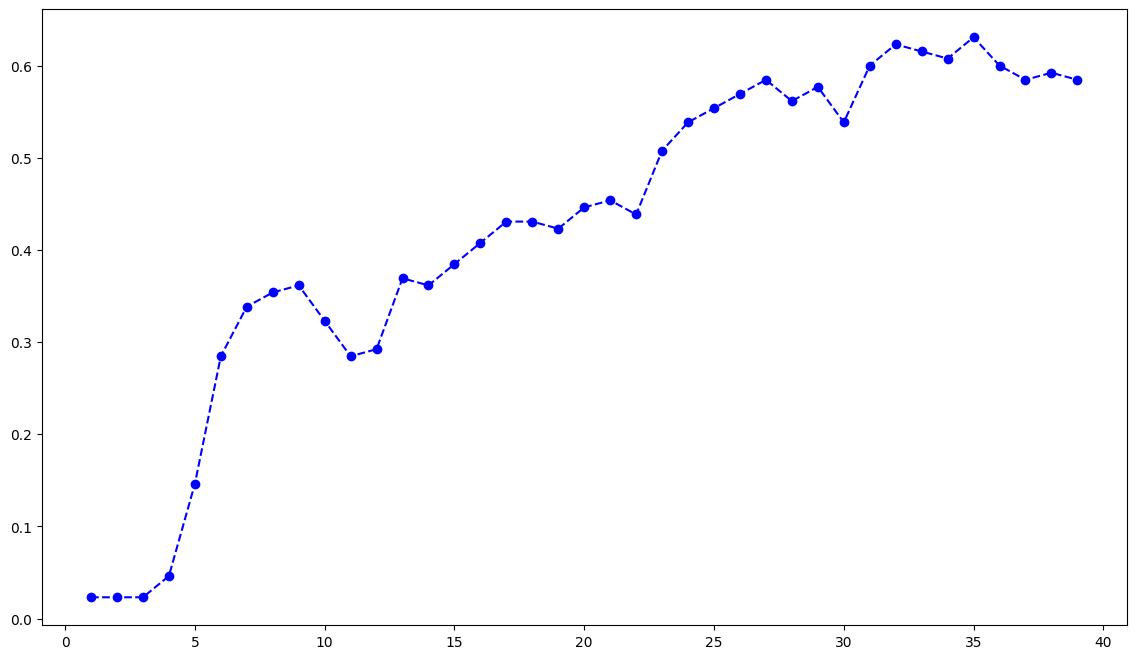

In [171]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')

In [172]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [173]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


### Grafico

# Modelo 1 Tabela Performace